# Hybrid - Part 4: Final Dataset Model Selection

**Environment Setup**

In [5]:
#Loading key libraries for later analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
pd.set_option('max_colwidth', 1000)
from collections import Counter
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate,GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
!pip install xgboost
!pip install spacy
import sklearn   
import scipy.io as scio
from sklearn.utils import shuffle
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import functions


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.       

In [6]:
#Read in training and testing sets
Train = pd.read_csv(r'Train_hybrid_updated.csv',low_memory=False,encoding='latin1')
Test = pd.read_csv(r'Test_hybrid_updated.csv',low_memory=False,encoding='latin1')

In [7]:
#Prepare Final DataFrame
Train.index = Train['Unnamed: 0'].values
Train = functions.drop_column(Train,'Unnamed: 0')
Test.index = Test['Unnamed: 0'].values
Test = functions.drop_column(Test,'Unnamed: 0')
X_train = Train.iloc[:,:-1]
X_test = Test.iloc[:,:-1]
y_train = Train.iloc[:,-1]
y_test = Test.iloc[:,-1]

## 1. Model Selection

### 1.1 Benchmark models 

In [20]:
#Cross validation and the scores used for evaluation and comparison
kfold = StratifiedKFold(n_splits=5,random_state=200,shuffle=True)
scoring = ('accuracy','precision_macro','recall_macro','f1_macro')

#Benchmark models with default settings
classifiers = [
    RandomForestClassifier(),
    LogisticRegression(max_iter = 250000),
    ExtraTreesClassifier(),
    XGBClassifier(),
    GaussianNB(),
    SVC(),
    KNeighborsClassifier(),
    MLPClassifier()
]
results = list()

#fit and train the training set with 5 fold cross validation to get its scores
for model in classifiers:
    model.seed = 20
    
    scores = cross_validate(model, X_train, y_train, cv=kfold, scoring= scoring, n_jobs =-1)
    sorted(scores.keys())
    accuracy = scores['test_accuracy'].mean()
    precision_macro = scores['test_precision_macro'].mean()
    recall_macro = scores['test_recall_macro'].mean()
    f1_macro = scores['test_f1_macro'].mean()
    score_description = 'Accuracy: {},Precision: {},Recall: {},F1 Score: {}'.format(round(accuracy,5),round(precision_macro,5),
                                                                                    round(recall_macro,5),round(f1_macro,5))
    results.append({'accuracy':accuracy ,'precision':precision_macro, 'recall':recall_macro ,'f1_score':f1_macro})
    print('{model:25} CV-5: {score}'.format(
    model=model.__class__.__name__,
    score=score_description
 ))

RandomForestClassifier    CV-5: Accuracy: 0.9682,Precision: 0.95194,Recall: 0.90205,F1 Score: 0.921
LogisticRegression        CV-5: Accuracy: 0.93964,Precision: 0.88966,Recall: 0.77974,F1 Score: 0.82264
ExtraTreesClassifier      CV-5: Accuracy: 0.96742,Precision: 0.94966,Recall: 0.9031,F1 Score: 0.92069
XGBClassifier             CV-5: Accuracy: 0.96408,Precision: 0.9276,Recall: 0.88976,F1 Score: 0.90138
GaussianNB                CV-5: Accuracy: 0.81549,Precision: 0.65718,Recall: 0.86271,F1 Score: 0.70669
SVC                       CV-5: Accuracy: 0.85936,Precision: 0.75461,Recall: 0.55309,F1 Score: 0.61262
KNeighborsClassifier      CV-5: Accuracy: 0.88164,Precision: 0.85459,Recall: 0.79106,F1 Score: 0.81046
MLPClassifier             CV-5: Accuracy: 0.96025,Precision: 0.94355,Recall: 0.9088,F1 Score: 0.92186


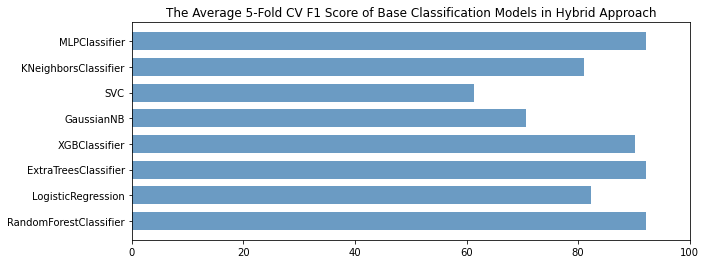

In [22]:
a = pd.DataFrame(results)
model = ['RandomForestClassifier','LogisticRegression','ExtraTreesClassifier','XGBClassifier','GaussianNB','SVC',
         'KNeighborsClassifier','MLPClassifier']
plt.figure(figsize=(10,4))

# Plot the score of each model
plt.barh(range(8), (a['f1_score'].values)*100, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(8), model)
plt.xlim(0,100)
plt.title("The Average 5-Fold CV F1 Score of Base Classification Models in Hybrid Approach")
plt.savefig(r'CV Score of class Model(after semi).png',bbox_inches='tight')

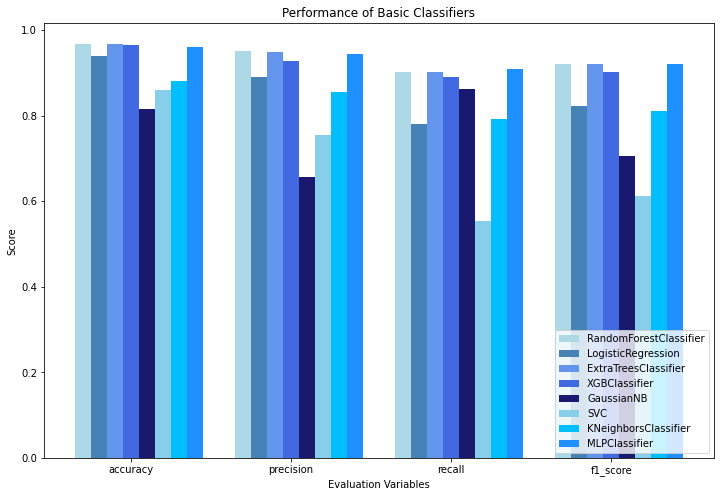

In [28]:
a = pd.DataFrame(results)
model = ['RandomForestClassifier','LogisticRegression','ExtraTreesClassifier','XGBClassifier','GaussianNB','SVC'
         ,'KNeighborsClassifier','MLPClassifier']

fig, ax = plt.subplots(figsize=(12,8))
width = 0.1

# Plot the score of each model
X = np.arange(4)
plt.bar(X + 0.00, a.loc[0], color = 'lightblue', width = width,label=model[0])
plt.bar(X + width, a.loc[1], color = 'steelblue', width = width,label=model[1])
plt.bar(X + width*2, a.loc[2], color = 'cornflowerblue', width = width,label=model[2])
plt.bar(X + width*3, a.loc[3], color = 'royalblue', width = width,label=model[3])
plt.bar(X + width*4, a.loc[4], color = 'midnightblue', width = width,label=model[4])
plt.bar(X + width*5, a.loc[5], color = 'skyblue', width =width,label=model[5])
plt.bar(X + width*6, a.loc[6], color = 'deepskyblue', width = width,label=model[6])
plt.bar(X + width*7, a.loc[7], color = 'dodgerblue', width = width,label=model[7])

ax.set_xticks([0.3,1.3,2.3,3.3])
ax.set_xticklabels(a.columns)
plt.xlabel('Evaluation Variables')
plt.ylabel('Score')
plt.title("Performance of Basic Classifiers")
plt.legend(loc='lower right')

plt.savefig(r'Performance of Basic Classifiers_Hybrid.png',bbox_inches='tight')

### 1.2 Fine Tuning Top 3 Selected Models

In [10]:
def gridsearch(model,param):
    kfold = StratifiedKFold(n_splits=5,random_state=200,shuffle=True)
    np.random.seed(0)
    clf=GridSearchCV(model,param, cv=kfold, n_jobs=-1,scoring='f1_macro')
    clf.fit(X_train, y_train)
    return clf.best_params_

#### 1.2.1 Random Forest Classifier

In [12]:
rf = RandomForestClassifier()

grid_param={"n_estimators": [10,50,100], 
           "max_features": ["auto","sqrt","log2"],
           "max_depth": [None,10,30], 
           "min_samples_split": [2,5,10],
           "min_samples_leaf": [1,5,10]}

gridsearch(rf,grid_param)

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

#### 1.2.2 Extra Trees Classifier

In [13]:
et = ExtraTreesClassifier()

grid_param={"n_estimators": [50,100,150], 
           "max_features": ["auto","sqrt","log2"],
           "max_depth": [None,10], 
           "min_samples_split": [2,5,10],
           "min_samples_leaf": [1,2,5]}

gridsearch(et,grid_param)

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 150}

#### 1.2.3 MLP Classifier

In [14]:
mlp = MLPClassifier()

grid_param = {
    'hidden_layer_sizes': [(100,),(100,100),(100,100,100)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001,0.05,0.10],
}
gridsearch(mlp,grid_param)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}

### 1.3 Results of Top Performanced Classifiers

In [29]:
kfold = StratifiedKFold(n_splits=5,random_state=200,shuffle=True)
scoring = ('accuracy','precision_macro','recall_macro','f1_macro')

classifiers = [
    RandomForestClassifier(max_depth= None,max_features='auto',min_samples_leaf= 1,min_samples_split= 5,n_estimators= 100),
    ExtraTreesClassifier(max_depth= None,max_features='log2',min_samples_leaf= 1,min_samples_split= 5,n_estimators= 150),
    MLPClassifier(activation= 'relu',alpha= 0.0001,hidden_layer_sizes= (100,))
]

results_post_tune = list()

for model in classifiers:
    scores = cross_validate(model, X_train, y_train, cv=kfold, scoring= scoring, n_jobs = -1)
    sorted(scores.keys())
    accuracy = scores['test_accuracy'].mean()
    precision_macro = scores['test_precision_macro'].mean()
    recall_macro = scores['test_recall_macro'].mean()
    f1_macro = scores['test_f1_macro'].mean()
    score_description = 'Accuracy: {},Precision: {},Recall: {},F1 Score: {}'.format(round(accuracy,5),round(precision_macro,5),
                                                                                    round(recall_macro,5),round(f1_macro,5))
    results_post_tune.append({'accuracy':accuracy ,'precision':precision_macro, 'recall':recall_macro ,'f1_score':f1_macro})
    print('{} CV-5: {}'.format(model.__class__.__name__,score_description))

RandomForestClassifier CV-5: Accuracy: 0.96761,Precision: 0.95897,Recall: 0.90128,F1 Score: 0.92348
ExtraTreesClassifier CV-5: Accuracy: 0.96359,Precision: 0.95369,Recall: 0.91053,F1 Score: 0.92803
MLPClassifier CV-5: Accuracy: 0.95927,Precision: 0.94213,Recall: 0.90707,F1 Score: 0.92053


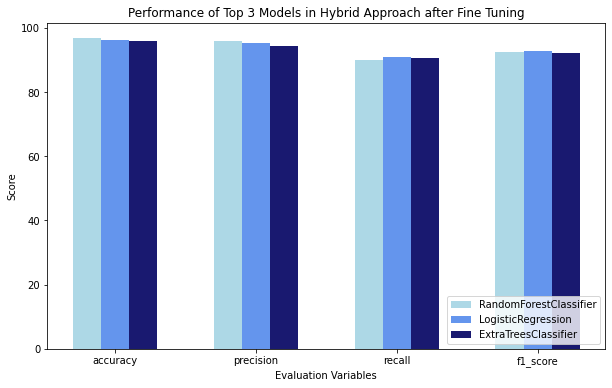

In [30]:
a = pd.DataFrame(results_post_tune)
model = ['RandomForestClassifier','LogisticRegression','ExtraTreesClassifier','MLPClassifier']

fig, ax = plt.subplots(figsize=(10,6))
width = 0.2

# Plot the score of each model
X = np.arange(4)
plt.bar(X + 0.00, a.loc[0]*100, color = 'lightblue', width = width,label=model[0])
plt.bar(X + width, a.loc[1]*100, color = 'cornflowerblue', width = width,label=model[1])
plt.bar(X + width*2, a.loc[2]*100, color = 'midnightblue', width = width,label=model[2])

ax.set_xticks([0.2,1.2,2.2,3.2])
ax.set_xticklabels(a.columns)
plt.xlabel('Evaluation Variables')
plt.ylabel('Score')
plt.title("Performance of Top 3 Models in Hybrid Approach after Fine Tuning")
plt.legend(loc='lower right')

plt.savefig(r'Performance of Top 3 Models in Hybrid Approach after Fine Tuning_Hybrid.png',bbox_inches='tight')